In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pickle

Read Dataset

In [3]:
data = pd.read_csv('countries of the world.csv')

In [4]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


Univariate Analysis

In [5]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

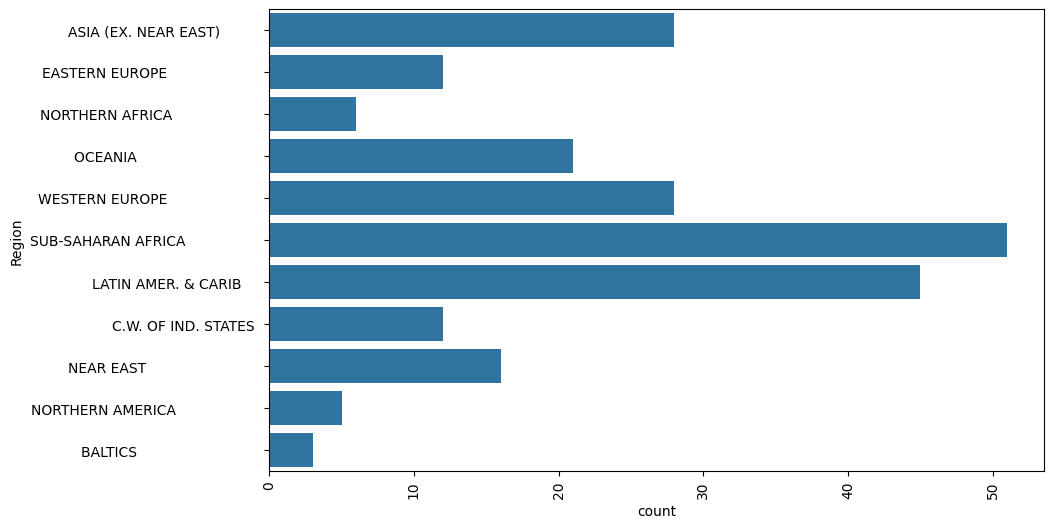

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data['Region'])
plt.xticks(rotation=90)
plt.show()

In [7]:
data_n = data.select_dtypes(include=['int','float'])
features = list(data_n.columns)

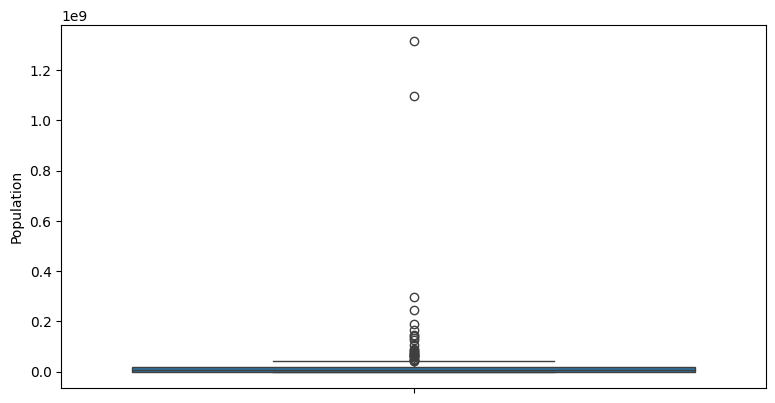

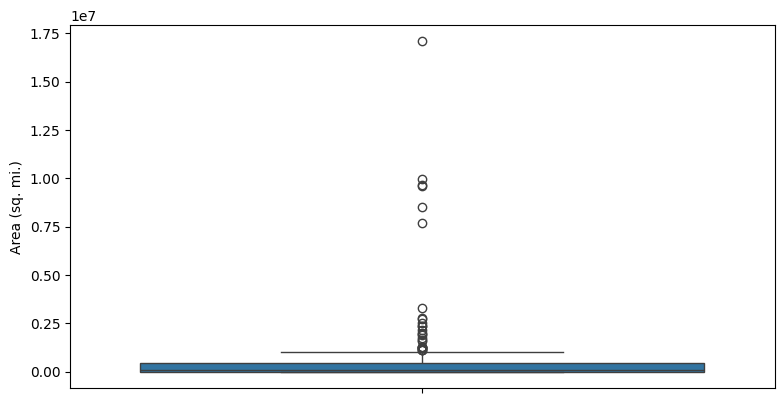

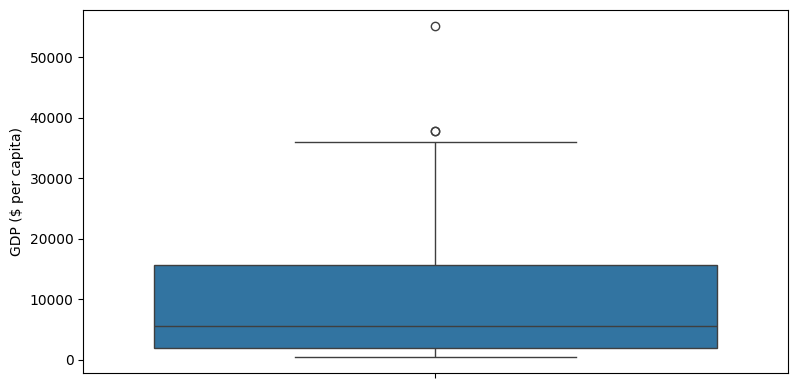

In [8]:
"""Out of 18 features 15 features have outliers"""

for i,j in enumerate(features):
    plt.figure(figsize=(20,50))
    plt.subplot(9,2,i+1)
    sns.boxplot(data_n[j])
    plt.show()

Bivariate Analysis

. Identify Categorical Columns:

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Country', 'Region', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')


In [10]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Handling missing values

In [11]:
# Fill missing values in numeric columns with mean of each column
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical columns with mode (most frequent value)
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    if not data[col].mode().empty:  # Check if mode is not empty
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    else:
        data[col] = data[col].fillna('missing')  # Placeholder for entirely NaN columns

In [12]:
data.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [14]:
# Convert necessary columns to numeric
columns_to_convert = ['Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'GDP ($ per capita)', 'Population']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [15]:
# Converting continuous values into categories

# Literacy is defined as being able to read and write, or having knowledge about a specific subject
literacy = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in data['Literacy (%)']]

# Phone
phone = ['0-200' if x<=200.0 else '200-400' if x>200.0 and x<=400.0 else '400-600' if x>400.0 and x<=600.0 else '600-800' if x>600.0 and x<=800.0 else '800-1000' for x in data['Phones (per 1000)']]

# Arable farming is growing crops in fields, which have usually been ploughed before planting
arable = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in data['Arable (%)']]

# Crops
crops = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in data['Crops (%)']]

# Others
others = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%' if x>60.0 and x<=80.0 else '80-100%' for x in data['Other (%)']]

# GDP
gdp = ['0-10000$' if x<=10000.0 else '10000-20000$' if x>10000.0 and x<=20000.0 else '20000-30000$' if x>20000.0 and x<=30000.0 else '30000-40000$' if x>30000.0 and x<=40000.0 else '40000-50000$' if x>40000.0 and x<=50000.0 else 'more than 50000$' for x in data['GDP ($ per capita)']]

# Population
population = ['Below 1 million' if x<=1000000 else '1-20 million' if x>1000000 and x<=20000000 else '20-60 million' if x>20000000 and x<=60000000 else '60-100 million' if x>60000000 and x<=100000000 else '100-500 million' if x>100000000 and x<=500000000 else 'above 500 million' for x in data['Population']]

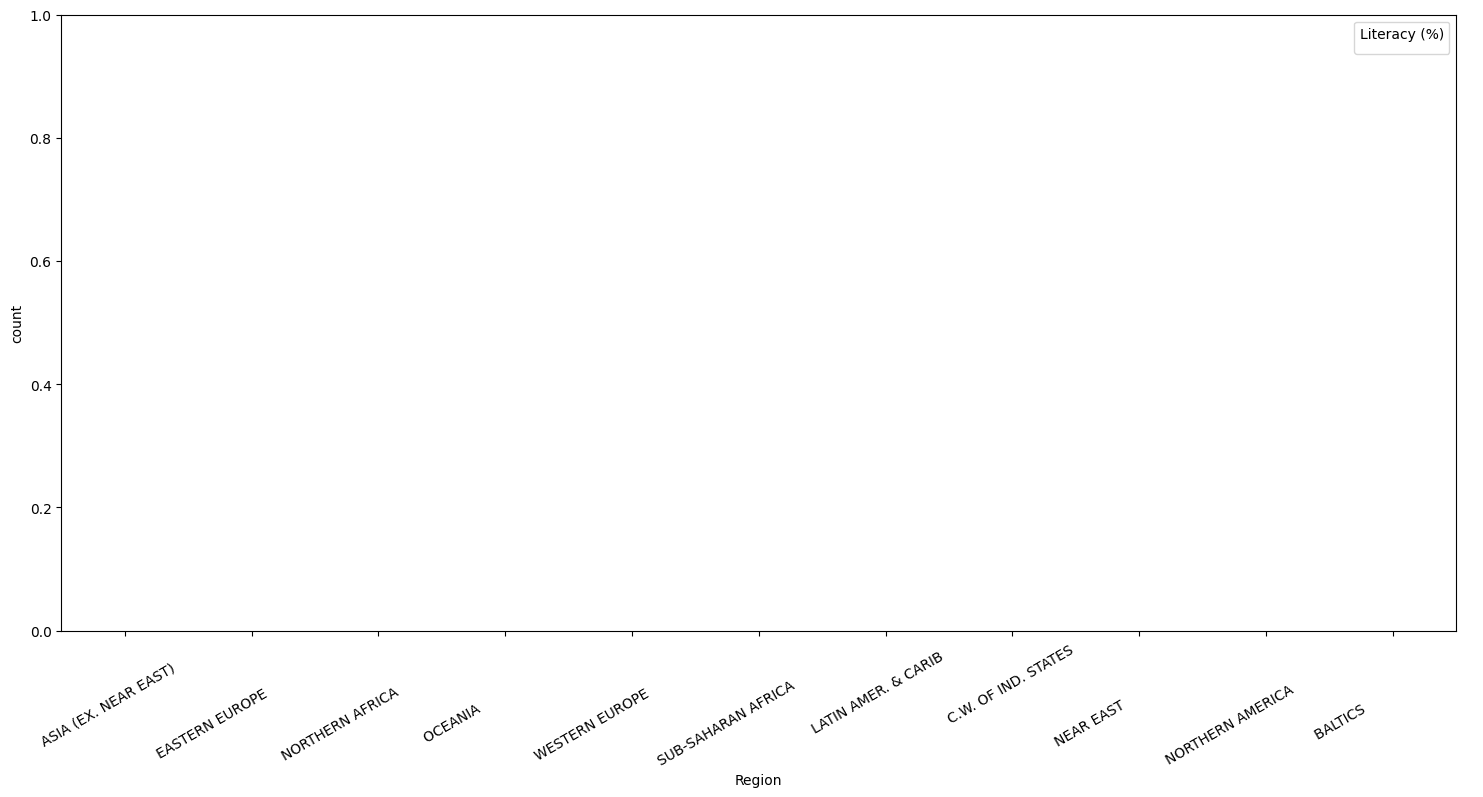

In [16]:
# Assuming 'Literacy (%)' is the column you want to use as hue
plt.figure(figsize=(18, 8))
sns.countplot(data=data, x='Region', hue='Literacy (%)')
plt.xticks(rotation=30)
# Define legend with explicit labels
legend_labels = data['Literacy (%)'].unique()  # Adjust as needed based on unique values
plt.legend(title='Literacy (%)', labels=legend_labels, loc='upper right')
plt.show()

<Figure size 1200x800 with 0 Axes>

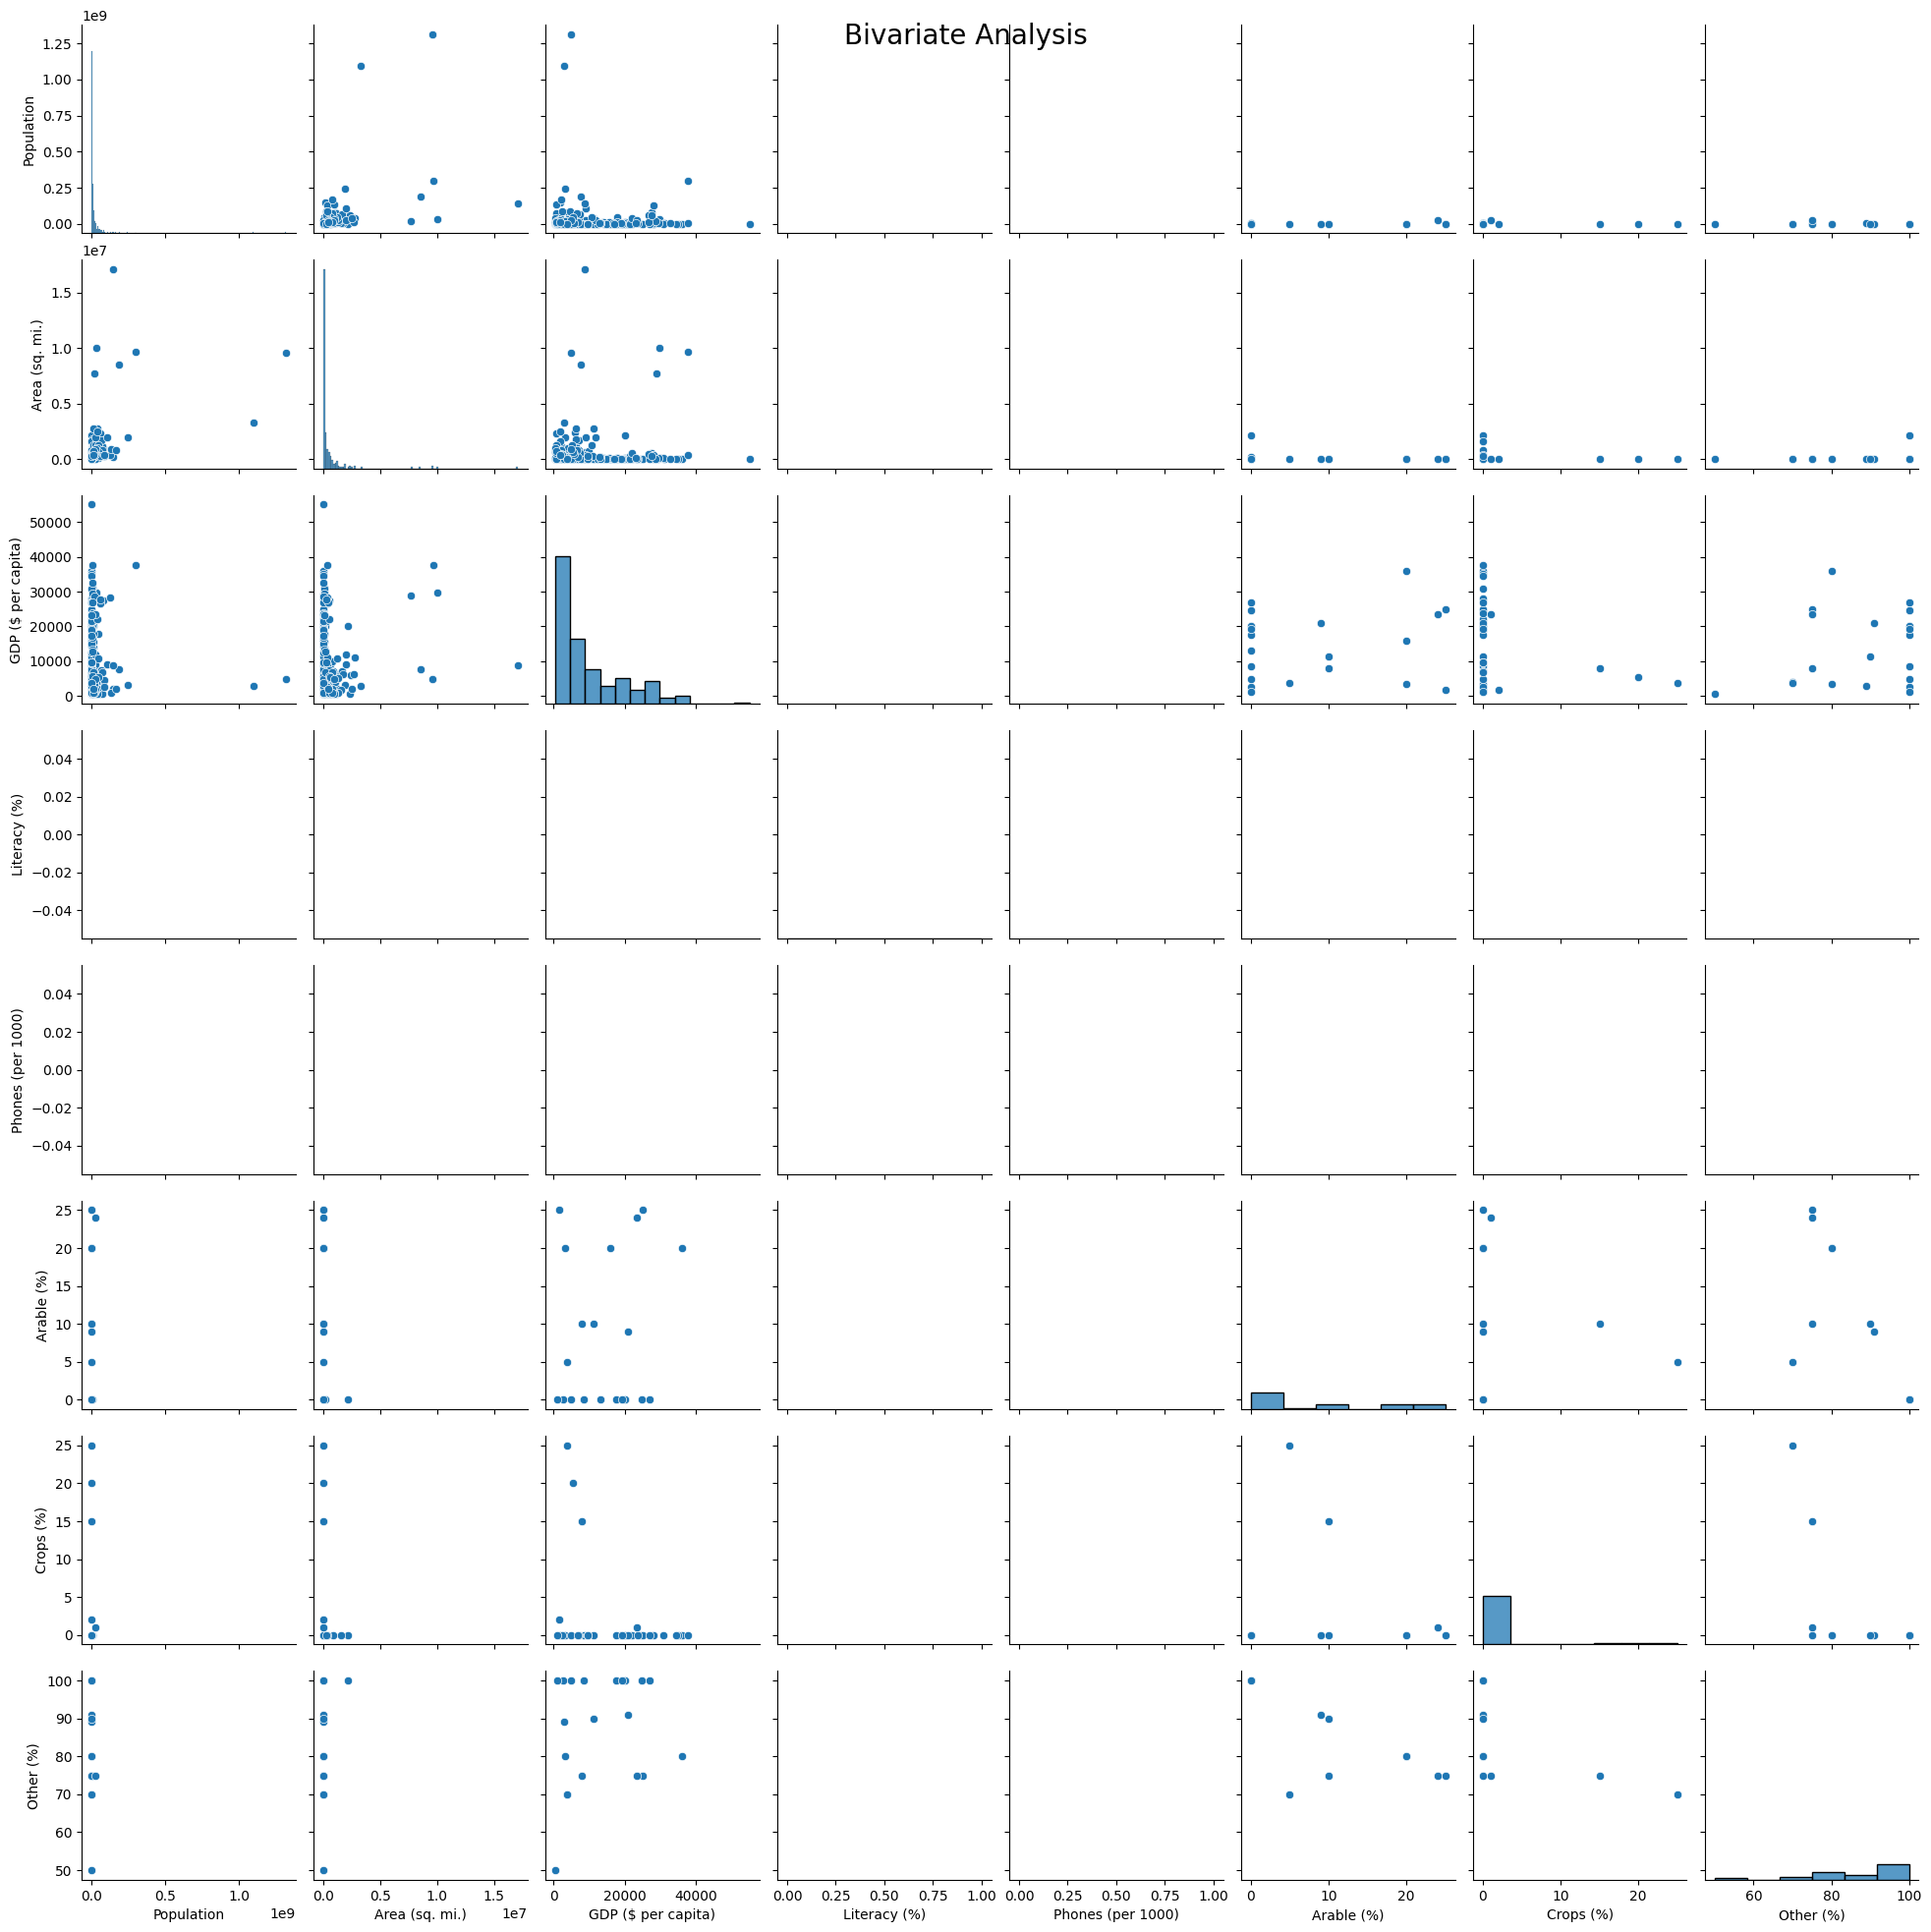

In [17]:
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.suptitle('Bivariate Analysis', fontsize=20)
plt.show()

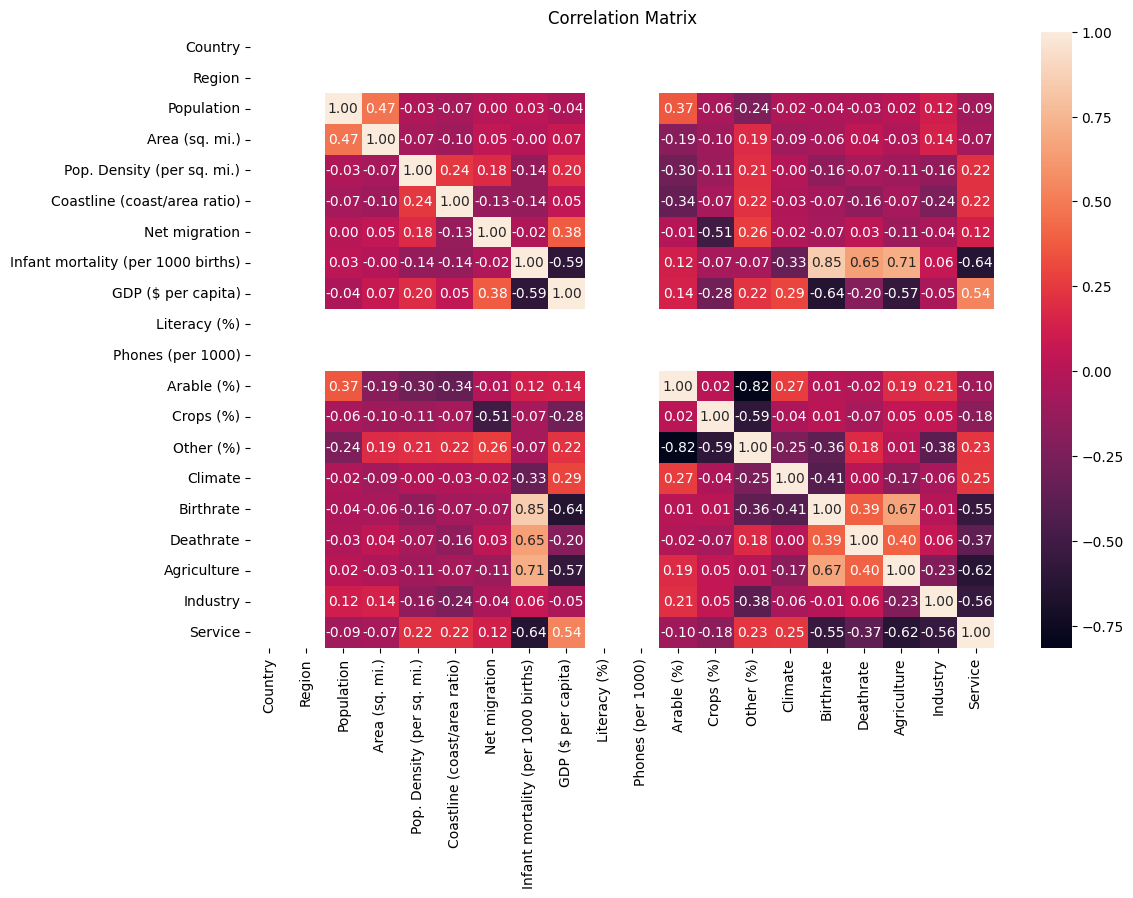

In [18]:
# Replace commas with dots in the entire DataFrame
data = data.replace(',', '.', regex=True)

# Convert all columns to numeric, forcing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Now you can plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
# Descriptive Analysis
print(data.describe())

       Country  Region    Population  Area (sq. mi.)  \
count      0.0     0.0  2.270000e+02    2.270000e+02   
mean       NaN     NaN  2.874028e+07    5.982270e+05   
std        NaN     NaN  1.178913e+08    1.790282e+06   
min        NaN     NaN  7.026000e+03    2.000000e+00   
25%        NaN     NaN  4.376240e+05    4.647500e+03   
50%        NaN     NaN  4.786994e+06    8.660000e+04   
75%        NaN     NaN  1.749777e+07    4.418110e+05   
max        NaN     NaN  1.313974e+09    1.707520e+07   

       Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
count                  227.000000                    227.000000   
mean                   379.047137                     21.165330   
std                   1660.185825                     72.286863   
min                      0.000000                      0.000000   
25%                     29.150000                      0.100000   
50%                     78.800000                      0.730000   
75%                    190

In [20]:
# Handling outliers (example using IQR method)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [22]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [23]:
# Convert all numeric columns that might have commas as decimal separators
for col in data.columns:
    # Check if the column is of type object
    if data[col].dtype == 'object':
        # Replace commas with dots
        data[col] = data[col].str.replace(',', '.')
        # Convert the column to numeric, forcing errors to NaN
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill any new NaN values that resulted from the conversion
data = data.fillna(data.mean(numeric_only=True))

In [24]:
# Identify categorical columns
# Replace 'Country' and 'Region' with actual categorical columns in your dataset
categorical_columns = ['Country', 'Region']  # Example columns
for col in categorical_columns:
    if col in data.columns:
        data[col] = LabelEncoder().fit_transform(data[col])

# If there are other categorical features, use OneHotEncoder (example for 'Region')
if 'Region' in data.columns:
    data = pd.get_dummies(data, columns=['Region'], drop_first=True)

In [25]:
# Assume 'GDP' is the target variable and the rest are features
X = data.drop(columns=['GDP ($ per capita)'])  # Replace 'GDP' with the actual target variable column name
y = data['GDP ($ per capita)']  # Replace 'GDP' with the actual target variable column name

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline# List of columns to keep with corrected names
columns_to_keep = [
    'Region',
    'Population',
    'Area (sq. mi.)',
    'Pop. Density (per sq. mi.)',
    'Net migration',
    'Coastline (coast/area ratio)',
    'Phones (per 1000)',
    'Arable (%)',
    'Crops (%)',
    'Climate',
    'Birthrate',
    'Deathrate',
    'Agriculture',
    'Industry',
    'Service',
    'GDP ($ per capita)'  # Include the target column here for now
]

# Keep only the columns that are present in the DataFrame
columns_to_keep = [col for col in columns_to_keep if col in data.columns]
data = data[columns_to_keep]

# Split the data into features and target variable
X = data.drop(columns=['GDP ($ per capita)'])
y = data['GDP ($ per capita)']

# Print shapes to verify
print("Feature data shape:", X.shape)
print("Target data shape:", y.shape)

# Define your numeric and categorical features
numeric_features = [
    'Population',
    'Area (sq. mi.)',
    'Pop. Density (per sq. mi.)',
    'Net migration',
    'Coastline (coast/area ratio)',
    'Phones (per 1000)',
    'Arable (%)',
    'Crops (%)',
    'Birthrate',
    'Deathrate',
    'Agriculture',
    'Industry',
    'Service'
]

categorical_features = ['Region', 'Climate']

# Ensure numeric features are present
numeric_features = [col for col in numeric_features if col in data.columns]

# Ensure categorical features are present
categorical_features = [col for col in categorical_features if col in data.columns]

# Create a column transformer with a pipeline for each type of column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and apply the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train and evaluate the LinearRegression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Feature data shape: (55, 14)
Target data shape: (55,)
Mean Squared Error: 21883733.76683594


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled Training Data:")
print(X_train_scaled)
print("Scaled Test Data:")
print(X_test_scaled)

Scaled Training Data:
[[-6.47219291e-01 -5.16195636e-01 -5.39040510e-01  4.69112293e-01
  -5.84388360e-01             nan  0.00000000e+00  0.00000000e+00
   0.00000000e+00  6.86037311e-01  1.25574014e+00  4.02588627e-01
   1.13967408e+00 -1.27081909e+00]
 [ 2.68692521e+00  1.29694268e+00 -2.86256441e-01 -2.65921213e-01
  -5.24934457e-01             nan  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.13249239e-01 -8.80204430e-01  9.79452196e-02
   9.54727805e-01 -8.22694104e-01]
 [ 2.15343342e+00 -6.15791697e-02  8.63471870e-01  4.69112293e-01
  -5.84388360e-01             nan  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.11650414e-01  2.38766531e-01  1.30908852e+00
  -2.81049550e-01 -9.36503624e-01]
 [-8.18309170e-01 -7.19631979e-01  2.09518420e+00  4.69112293e-01
   1.68791080e+00             nan  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.02311185e+00 -9.42248275e-02  1.45769506e+00
  -1.71017982e+00  1.30460629e-01]
 [-7.15940504e-01 -6.78200486e-01  4.05727746e

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [33]:
# List of columns to keep with corrected names
columns_to_keep = [
    'Region',
    'Population',
    'Area (sq. mi.)',
    'Pop. Density (per sq. mi.)',
    'Net migration',
    'Coastline (coast/area ratio)',
    'Phones (per 1000)',
    'Arable (%)',
    'Crops (%)',
    'Climate',
    'Birthrate',
    'Deathrate',
    'Agriculture',
    'Industry',
    'Service',
    'GDP ($ per capita)'  # Include the target column here for now
]

# Keep only the columns that are present in the DataFrame
columns_to_keep = [col for col in columns_to_keep if col in data.columns]
data = data[columns_to_keep]

# Print the columns to keep
print("Columns after filtering:", data.columns.tolist())

# Impute missing values in the 'Phones (per 1000)' column
phone_imputer = SimpleImputer(strategy='mean')
data['Phones (per 1000)'] = phone_imputer.fit_transform(data[['Phones (per 1000)']])

# Print the DataFrame after imputing missing values
print("\nDataFrame after imputing missing values in 'Phones (per 1000)' column:\n", data)

# Split the data into features and target variable
X = data.drop(columns=['GDP ($ per capita)'])
y = data['GDP ($ per capita)']

# Print shapes to verify
print("Feature data shape:", X.shape)
print("Target data shape:", y.shape)

# Define your numeric and categorical features
numeric_features = [
    'Population',
    'Area (sq. mi.)',
    'Pop. Density (per sq. mi.)',
    'Net migration',
    'Coastline (coast/area ratio)',
    'Phones (per 1000)',
    'Arable (%)',
    'Crops (%)',
    'Birthrate',
    'Deathrate',
    'Agriculture',
    'Industry',
    'Service'
]

categorical_features = ['Region', 'Climate']

# Ensure numeric features are present
numeric_features = [col for col in numeric_features if col in data.columns]

# Ensure categorical features are present
categorical_features = [col for col in categorical_features if col in data.columns]

# Create a column transformer with a pipeline for each type of column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and apply the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train and evaluate the LinearRegression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("\nDataFrame after imputing missing values in 'Phones (per 1000)' column:\n", data)

Columns after filtering: ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Net migration', 'Coastline (coast/area ratio)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'GDP ($ per capita)']

DataFrame after imputing missing values in 'Phones (per 1000)' column:
      Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  Net migration  \
14       303770           13940                        21.8          -2.20   
20       287730           22966                        12.5           0.00   
21      7862944          112620                        69.8           0.00   
23      2279723           47000                        48.5           0.00   
29       379444            5770                        65.8           3.59   
31     13902972          274200                        50.7           0.00   
33      8090068           27830                       290.7          -0.06   
34     13881427      

In [34]:
# Model Building
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

In [35]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {mse}, R^2 Score = {r2}')

Linear Regression: Mean Squared Error = 21883733.766837504, R^2 Score = -0.9441781713294894
Random Forest: Mean Squared Error = 7133952.090909091, R^2 Score = 0.36621080852875953
Support Vector Regression: Mean Squared Error = 15330417.613966553, R^2 Score = -0.3619733999691279


In [31]:
data.isnull().sum()

Population                       0
Area (sq. mi.)                   0
Pop. Density (per sq. mi.)       0
Net migration                    0
Coastline (coast/area ratio)     0
Phones (per 1000)               55
Arable (%)                       0
Crops (%)                        0
Climate                          0
Birthrate                        0
Deathrate                        0
Agriculture                      0
Industry                         0
Service                          0
GDP ($ per capita)               0
dtype: int64

In [36]:
# Model Comparison
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    results[name] = -scores.mean()

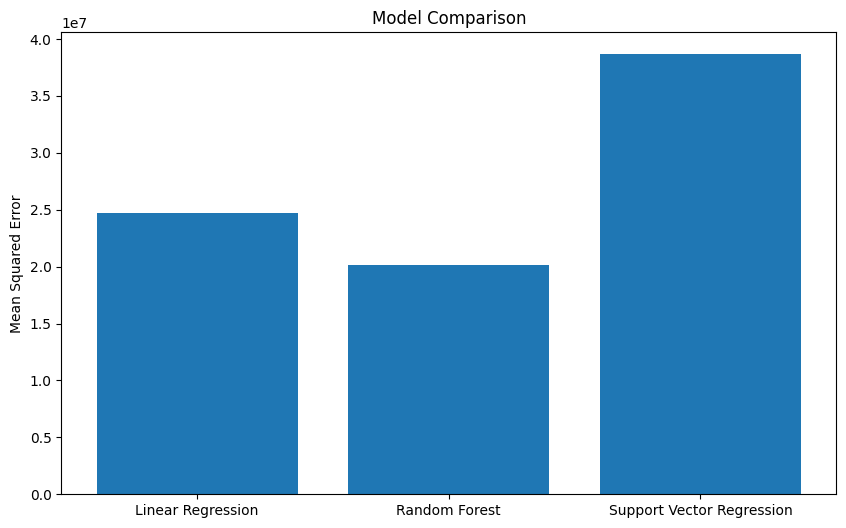

In [37]:
# Plotting model comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.show()

In [38]:
# Evaluating the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Model ({best_model_name}): Mean Squared Error = {mse}, R^2 Score = {r2}')

Best Model (Random Forest): Mean Squared Error = 7133952.090909091, R^2 Score = 0.36621080852875953


In [41]:
# Saving the best model
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')